## 4.5 특성 자동 선택
- 특성 차원이 높은 데이터 셋에 대해 유용한 특성만 선택하고 나머지는 무시하는 통계적 기법
  - Univariate Statistics (일변량 통계)
  - Model-based Selection (모델 기반 선택)
  - Iterative Selection (반복적 선택)
- 위 방법 모두 지도학습 방법
  - 최적의 특성을 찾기 위해서 타깃 정보이 필요
- 훈련 데이터와 테스트 데이터를 나눈 다음 훈련 데이터에 대해서만 위 기법 적용하여 특성 선택해야 함.

### 4.5.1 Univariate statistics (일변량 통계)
- ANOVA (Analysis of Variance, 분산분석)
  - 개개의 특성과 타깃 사이에 중요한 통계적 관계가 있는지 분석하여 관련성이 깊은 특성만 선별
  - 각 특성이 독립적으로 평가됨
  - 계산 속도 빠름
  - 분석을 위한 모델 구성 필요 없음
  - 특성 선택 이후 적용하려는 모델에 상관없이 사용가능

In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [2]:
# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
print("Shape of noise: {}".format(noise.shape))

Shape of noise: (569, 50)


In [3]:
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])
print("Shape of X_w_noise: {}".format(X_w_noise.shape))

Shape of X_w_noise: (569, 80)


- ANOVA를 내장한 scikit-learn 일변량 분석 모듈
  - feature_selection.SelectKBest
    - 가장 연관성이 높은 k개의 특성 선택 
  - feature_selection.SelectPercentile
    - 가장 연관성이 높은 특성을 지정된 비율 만큼 선택

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]
[9, 11, 18, 19]


([], <a list of 0 Text yticklabel objects>)

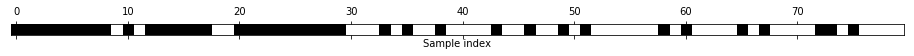

In [5]:
mask = select.get_support()
print(mask)

# 30보다 작거나 같은 인덱스
print([x for x in np.where(mask == False)[0].tolist() if x < 30])

# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [6]:
mask.reshape(1, -1)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True, False,  True,  True,  True,  True,  True,  True,
        False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False, False, False,  True, False,  True,
        False, False,  True, False, False, False, False,  True, False,
        False,  True, False, False,  True, False,  True, False, False,
        False, False, False, False,  True, False,  True, False, False,
        False, False,  True, False,  True, False, False, False, False,
         True,  True, False,  True, False, False, False, False]])

- 전체 80개의 특성을 이용했을 때와 선택된 40개의 특성을 이용했을 때의 LogisticRegression 모델 성능 비교

In [7]:
from sklearn.linear_model import LogisticRegression

# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression()

lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Score with all features: 0.930
Score with only selected features: 0.940
